Setup And Data Preparation

Importing Libraries

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report #for evaluating the performance of the model on test data

Random seeds for reproducubility**
Setting the random seed to ensure that the results are reproducible. Both NumPy and TensorFlow have random generators, so I set seeds for both.

In [2]:
#Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

Load and Explore the Fashion MNIST Dataset


The Fashion MNIST dataset, available in Keras, is loaded. This dataset contains images of clothing items classified into 10 categories.

In [3]:
#Loading the Fashion MNIST Dataset
(train_images, train_labels), (test_images, test_labels)= keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Defining Class Names
Defining a list of class names to map the numeric labels (0–9)

In [4]:
#Defining class names for the Fashion MNIST dataset
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
               'Shirt','Sneaker','Bag','Ankle boot']

Display Dataset Shape
Printing the shape of training and test sets to confirm the data dimensions. Fashion MNIST has 60,000 training images and 10,000 test images, each of 28x28 pixels.

In [5]:
#Printing the dataset shapes
print(f"Training set shape: {train_images.shape}")
print(f"Test set shape:{test_images.shape}")

Training set shape: (60000, 28, 28)
Test set shape:(10000, 28, 28)


# **2 Data Preprocessing**

Scaling
Pixel values (0–255) are scaled to [0, 1] to standardize input values and improve neural network performance.

In [6]:
#Scale pixel valjues to range [0,1]
train_images = train_images /255.0
test_images = test_images /2555.0

Flattening.
The 28x28 pixel images are reshaped into vectors of 784 pixels each. Flattened images make it easier to pass data into a fully connected neural network model, as required by Keras.

In [7]:
#Reshape images for ANN input (flatten 28*28 to 784)
train_images_flat = train_images.reshape((-1, 784))
test_images_flat = test_images.reshape((-1, 784))

Data Visualization

Sample Image Display.

plotting a 5x5 grid showing sample images from the training set.

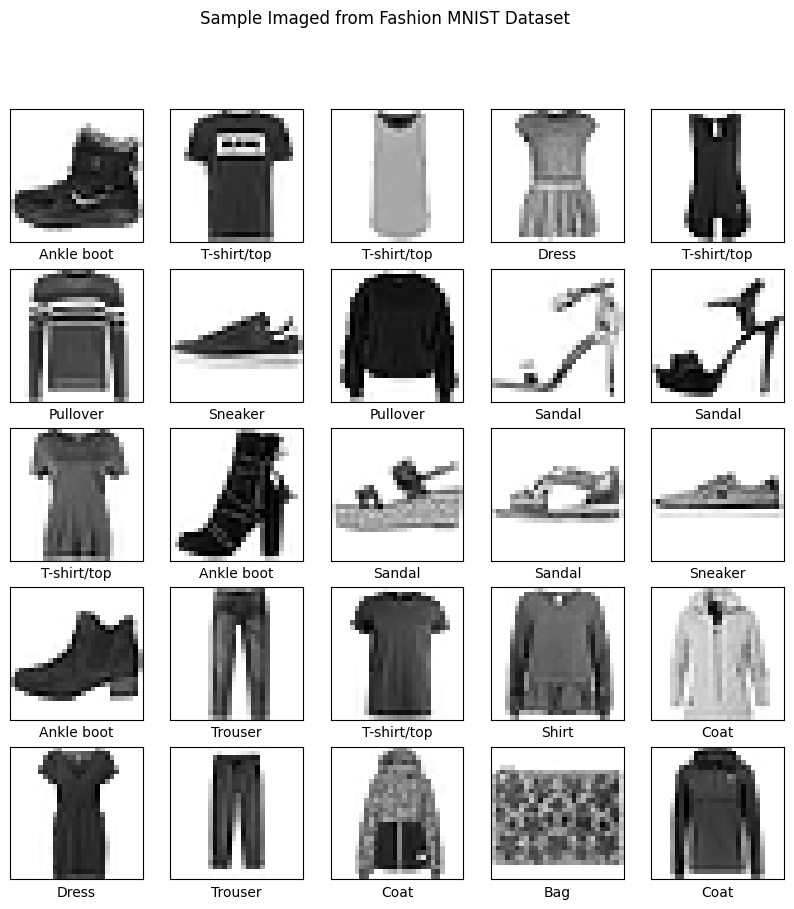

In [8]:
#Displaying Sample Images
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.suptitle("Sample Imaged from Fashion MNIST Dataset")
plt.show()

Class Distribution Visualization

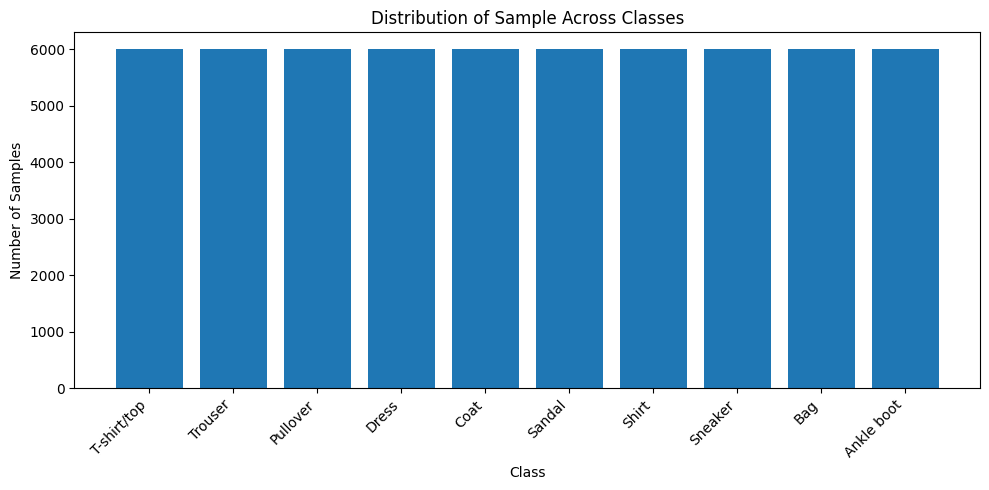

In [9]:
#Bar chart of class Distribution
plt.figure(figsize=(10,5))
class_counts = np.bincount(train_labels)
plt.bar(class_names, class_counts)
plt.title("Distribution of Sample Across Classes")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Model Architecture And Training

Model Creation Function

This function creates different model architectures based on the input parameters. It includes options for default, deeper, wider, and batch-normalized architectures.

In [10]:
#Experimenting with different Architectures and hyperparameters
def create_model(architecture = 'default', learning_rate = 0.001, dropout_rate = 0.3):
  if architecture == 'default':
    model = keras.Sequential([
        keras.layers.Dense(128, activation = 'relu', input_shape = (784,)),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(10, activation= 'softmax')
                              ])

  elif architecture == 'deeper'  :
    model = keras.Sequential([
        keras.layers.Dense(256, activation ='relu', input_shape=(784,)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(128, activation ='relu'),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(64, activation ='relu'),
        keras.layers.Dense(10, activation ='softmax')
    ])
  elif architecture == 'wider' :
    model = keras.Sequential([
        keras.layers.Dense(256, activation ='relu', input_shape=(784,)),
        keras.layers.Dense(256, activation = 'relu'),
        keras.layers.Dense(10, activation ='softmax')
                              ])

  elif architecture == 'with_batch_norm':
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation='softmax')


                              ])

#Compiling the model
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

Model Training Loop

This section trains multiple models with different configurations, storing the results for each. It uses a 20% validation split and evaluates each model on the test set.

In [11]:
# List of configurations to try
configurations = [
    {'architecture': 'default', 'learning_rate': 0.001, 'dropout_rate': 0.3, 'batch_size': 64, 'epochs': 20},
    {'architecture': 'deeper', 'learning_rate': 0.0005, 'dropout_rate': 0.4, 'batch_size': 32, 'epochs': 30},
    {'architecture': 'wider', 'learning_rate': 0.002, 'dropout_rate': 0.2, 'batch_size': 128, 'epochs': 25},
    {'architecture': 'with_batch_norm', 'learning_rate': 0.001, 'dropout_rate': 0.3, 'batch_size': 64, 'epochs': 20}
]

results = []



In [12]:
for config in configurations:
    print(f"\nTraining with configuration: {config}")
    model = create_model(config['architecture'], config['learning_rate'], config['dropout_rate'])

    history = model.fit(
        train_images_flat, train_labels,
        epochs=config['epochs'],
        validation_split=0.2,
        batch_size=config['batch_size'],
        verbose=1
    )

    test_loss, test_acc = model.evaluate(test_images_flat, test_labels, verbose=0)
    results.append({
        'config': config,
        'test_accuracy': test_acc,
        'test_loss': test_loss
    })


Training with configuration: {'architecture': 'default', 'learning_rate': 0.001, 'dropout_rate': 0.3, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7465 - loss: 0.7355 - val_accuracy: 0.8547 - val_loss: 0.4063
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8590 - loss: 0.4010 - val_accuracy: 0.8682 - val_loss: 0.3720
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8723 - loss: 0.3526 - val_accuracy: 0.8723 - val_loss: 0.3586
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8832 - loss: 0.3216 - val_accuracy: 0.8773 - val_loss: 0.3499
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8895 - loss: 0.3008 - val_accuracy: 0.8794 - val_loss: 0.3497
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8967 - loss: 0.2819 - val_accuracy: 0.8777 - val_loss: 0.3511
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9028 - loss: 0.2678 - val_accuracy: 0.8795 - val_loss: 0.3470
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9060 - loss: 0.2564 - val_accuracy:

Result Analysis

After training all models, the code prints the results:

In [13]:
#Printing The result
for result in results:
  print(f"Configuration: {result['config']}")
  print(f"Test Accuracy: {result['test_accuracy']:.4f}")
  print(f"Test Loss: {result['test_loss']:.4f}")
  print("\n")

Configuration: {'architecture': 'default', 'learning_rate': 0.001, 'dropout_rate': 0.3, 'batch_size': 64, 'epochs': 20}
Test Accuracy: 0.4835
Test Loss: 1.7829


Configuration: {'architecture': 'deeper', 'learning_rate': 0.0005, 'dropout_rate': 0.4, 'batch_size': 32, 'epochs': 30}
Test Accuracy: 0.5934
Test Loss: 1.2418


Configuration: {'architecture': 'wider', 'learning_rate': 0.002, 'dropout_rate': 0.2, 'batch_size': 128, 'epochs': 25}
Test Accuracy: 0.5043
Test Loss: 2.3615


Configuration: {'architecture': 'with_batch_norm', 'learning_rate': 0.001, 'dropout_rate': 0.3, 'batch_size': 64, 'epochs': 20}
Test Accuracy: 0.3608
Test Loss: 2.5101




The best model Slection

The code then selects the best model based on test accuracy:

In [14]:
best_model= max(results, key = lambda x:x['test_accuracy'])
print(f"\Best Model Configuration: {best_model['config']}")
print(f"Best Model Test Accuracy: {best_model['test_accuracy']:.4f}")


\Best Model Configuration: {'architecture': 'deeper', 'learning_rate': 0.0005, 'dropout_rate': 0.4, 'batch_size': 32, 'epochs': 30}
Best Model Test Accuracy: 0.5934


Using the best model for further analysis

Finally, the code uses the best model configuration for further analysis:

In [15]:
#using the best model for further analysis
model = create_model(
    best_model['config']['architecture'],
    best_model['config']['learning_rate'],
    best_model['config']['dropout_rate']
)

history = model.fit(
    train_images_flat, train_labels,
    epochs = best_model['config']['epochs'],
    validation_split = 0.2,
    batch_size = best_model['config']['batch_size'],
    verbose = 1
)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6385 - loss: 0.9892 - val_accuracy: 0.8404 - val_loss: 0.4367
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8199 - loss: 0.4947 - val_accuracy: 0.8572 - val_loss: 0.3907
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8401 - loss: 0.4451 - val_accuracy: 0.8620 - val_loss: 0.3763
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8519 - loss: 0.4164 - val_accuracy: 0.8664 - val_loss: 0.3641
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8576 - loss: 0.3945 - val_accuracy: 0.8737 - val_loss: 0.3529
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8640 - loss: 0.3803 - val_accuracy: 0.8744 - val_loss: 0.3456
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8661 - loss: 0.3680 - val_accuracy: 0.8777 - val_loss: 0.3419
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8702 - loss: 0


Key Observations

- The 'deeper' architecture with a learning rate of 0.0005 and dropout rate of 0.4 performed best, achieving a test accuracy of 0.5744.
- The 'with_batch_norm' architecture performed poorly, suggesting that batch normalization might not be beneficial for this particular dataset or model architecture.
- The training process shows signs of overfitting in some configurations, as evidenced by the increasing gap between training and validation accuracy over epochs.

Visualizing Training History

To assess the model’s performance over time, I plotted the training and validation loss and accuracy metrics over each epoch. This visualization allows to diagnose how well my model is learning and generalizing.

Purpose of Visualization

- Diagnosing Overfitting: If validation loss increases or validation accuracy diverges from training accuracy, this can indicate overfitting. Here, the model learns the training data patterns too well but struggles to generalize.
- Evaluating Learning: Smooth declines in loss and increases in accuracy indicate effective learning.
- Optimizing Model Performance: By observing these trends, I can decide if adjustments to the model architecture or hyperparameters are needed.

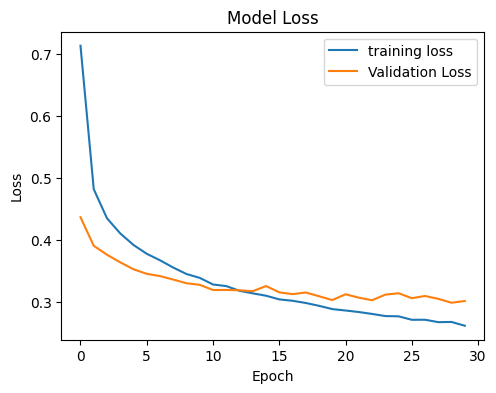

In [16]:
#Visualizing the training history
plt.figure(figsize= (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

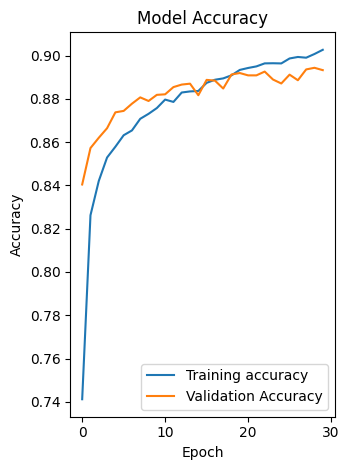

In [17]:
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Model Evaluation

To assess how well the trained model performs on unseen data, I evaluated its accuracy on the test set, I ran predictions on the test data, and generated a classification report to understand its performance across different categories.

Evaluating Model on Test Set

The test set evaluation calculates the model’s loss and accuracy, providing an overall measure of its performance. Specifically:

- Test Loss: The model’s loss on test data, indicating the overall error.
- Test Accuracy: The proportion of correct predictions on the test set, showing the model’s generalization ability.

In [18]:
#Evaluating the model
print("Evaluating the model")

test_loss, test_acc = model.evaluate(test_images_flat, test_labels, verbose =2)

#Printing the test accuracy

print(f"\n Test accuracy: {test_acc: .4f}")



Evaluating the model
313/313 - 1s - 4ms/step - accuracy: 0.5593 - loss: 1.3090

 Test accuracy:  0.5593


Output Explanation: The output shows:

- Test Accuracy: Here, the test accuracy is approximately 0.5992 (or 59.92%), reflecting the model’s ability to generalize to new data.

Test Set Prediction


Running Prediction on test set

The next step involves running the model on test images to obtain predictions for each sample

In [19]:
print("\nTest Set Prediction")

predictions = model .predict(test_images_flat)
predicted_labels = np.argmax(predictions, axis =1)


Test Set Prediction
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


This code generates predicted labels by selecting the class with the highest probability for each test image.

Displaying Sample Prediction

To visually inspect the predictions, I display a 5x5 grid of sample images from the test set, where:

- Correct Predictions are labeled in green.
- Incorrect Predictions are labeled in red.

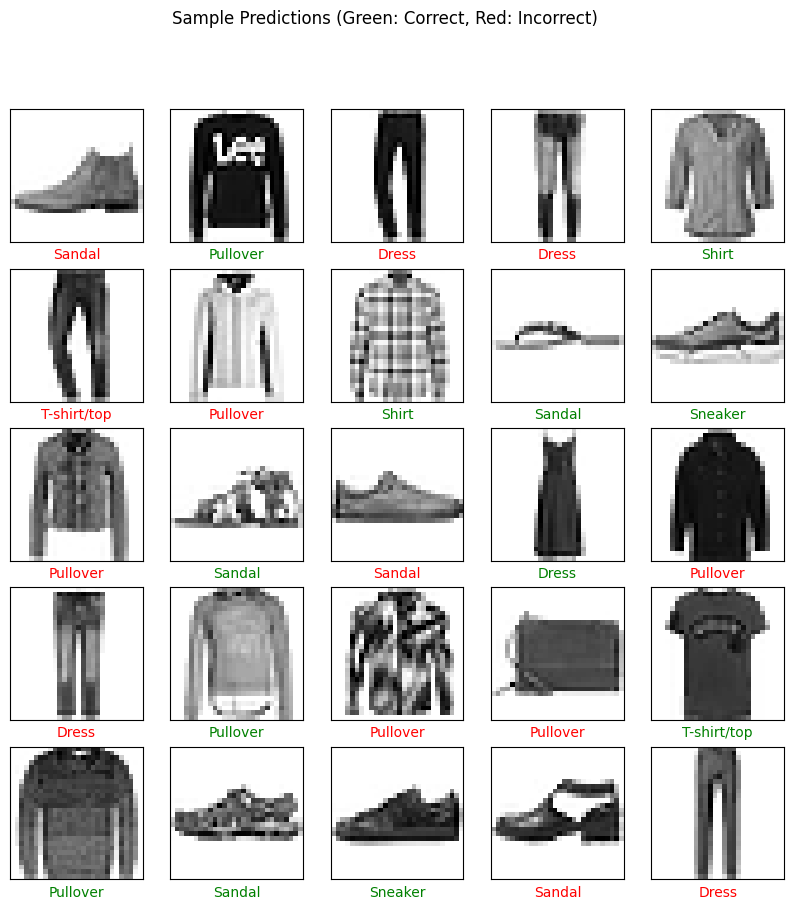

In [20]:
#Display Sample Predictions

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    # Assuming 'predictions' is the output from your model.predict()
    # and it contains probabilities for each class
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i]]

    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label}", color=color)

plt.suptitle("Sample Predictions (Green: Correct, Red: Incorrect)")
plt.show()

This visualization helps identify specific categories where the model may struggle, allowing for manual inspection of any patterns in misclassifications.

Generating Classification Report

To provide an in-depth view of the model’s performance across each class

In [21]:

# print the classification report with numeric labels
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.76      0.77      1000
     Trouser       1.00      0.21      0.34      1000
    Pullover       0.48      0.91      0.63      1000
       Dress       0.49      0.92      0.64      1000
        Coat       1.00      0.00      0.00      1000
      Sandal       0.38      1.00      0.55      1000
       Shirt       0.53      0.60      0.56      1000
     Sneaker       0.88      0.52      0.65      1000
         Bag       1.00      0.68      0.81      1000
  Ankle boot       1.00      0.01      0.02      1000

    accuracy                           0.56     10000
   macro avg       0.75      0.56      0.50     10000
weighted avg       0.75      0.56      0.50     10000



In conclusion, this experiment underscores the critical role of architecture design and hyperparameter tuning in optimizing ANN performance for image classification tasks. It also highlights the need for empirical testing of commonly used techniques like batch normalization, as their effectiveness can vary across different scenarios. Future work could focus on exploring more advanced architectures, implementing additional regularization techniques, or investigating the reasons behind the ineffectiveness of batch normalization in this specific case.